# Linear Regression

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [849]:
import numpy as np

class Linear_regression():
    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X)) # w[0] = b        
        w = np.linalg.inv(X.T@X)@(X.T)@y 
        return w
    
# Gradient Descent 
class GD_Linear_regression(): 
    def __init__(self, lr = 1e-03):
        self.lr = lr
        
    def fit(self, X, y, batch_size = 2,  n_iterations = 10):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        X, X_validation, y, y_validation = train_test_split(X, y.reshape(-1, 1), test_size = 0.2) #cross validation splitting
        w = np.ones((X.shape[1],1))
        w[0] = 0
        
        train_loss_history = []
        test_loss_history = []
        for i in range(n_iterations):
            r = int(X.shape[0] // batch_size) + 1
            y_hat = np.zeros((X.shape[0])).reshape(-1, 1)
            for j in range(r):
                down_idx = min( X.shape[0]-1 , j*batch_size)
                up_idx = min(X.shape[0], (j+1) * batch_size)                
                y_hat[down_idx: up_idx] = self.model(X[down_idx: up_idx, :], w)
                grad = self.grad_fn(X[down_idx: up_idx, :], y[down_idx: up_idx].reshape(-1, 1), y_hat[down_idx: up_idx])
                w += self.lr * np.mean(grad, axis = 0).reshape(-1, 1)
            train_loss = self.cost_function(y, y_hat)
            train_loss_history.append(train_loss)
            test_loss = self.cost_function(y_validation, self.model(X_validation, w).reshape(-1, 1))
            test_loss_history.append(test_loss)
        return w, train_loss_history, test_loss_history
                
    def cost_function(self, Y, Y_hat):
        cost = [loss(y, y_hat) for y, y_hat in zip(Y, Y_hat)]
        return np.array(cost).mean()

    def loss(self, y, y_hat):
        return (y - y_hat)**2
    
    def model(self, X, w):
        return X@w
    
    def grad_fn(self, X, y, y_hat):
        return self.dmodel_dw(X) * self.dcost_dmodel(y, y_hat)
    
    def dmodel_dw(self, X):
        return X
        
    def dcost_dmodel(self, y, y_hat):
        return 2*(y - y_hat)

In [837]:
X, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=10)

In [868]:
Lr = Linear_regression()
w_lr = Lr.fit(X, y)

In [872]:
gdLR = GD_Linear_regression()
w_gdLR, train_loss, test_loss= gdLR.fit(X, y, n_iterations = 100)

### Empirical(train) vs test Loss

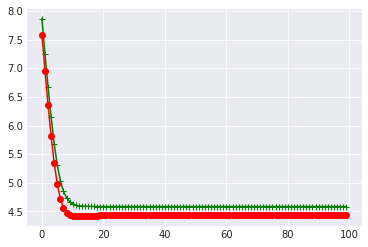

In [876]:
plt.plot(np.log(train_loss), marker = '+', c = 'green')
plt.plot(np.log(test_loss), c = 'red', marker = 'o')

### Regression Line extracted from two methods

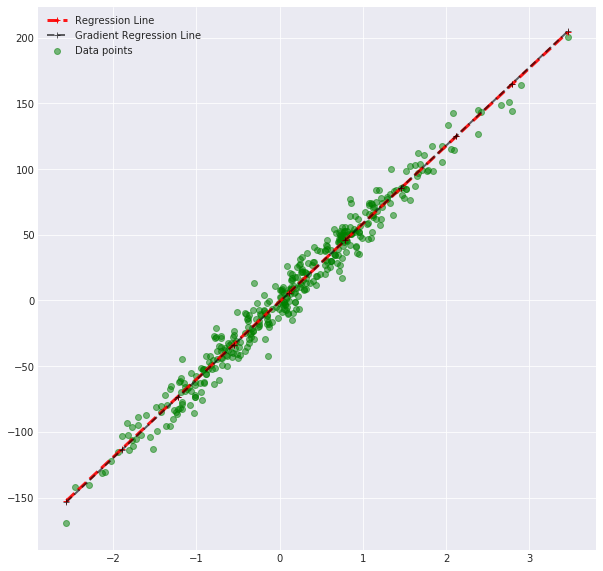

In [875]:
l = np.linspace(np.amin(X), np.amax(X), 10)
fig = plt.figure(figsize=(10, 10))
# ax = fig.gca()
plt.style.use('seaborn-darkgrid')
ax.set_facecolor('white')

plt.plot(l, w_lr[1]*l + w_lr[0], c = 'red', alpha = 0.9, label = 'Regression Line',
         linestyle = '--', marker = '+', linewidth = 3)
plt.plot(l, w_gdLR[1]*l + w_gdLR[0], c = 'black', alpha = 0.6, label = 'Gradient Regression Line',
         linestyle = '--', marker = '+', linewidth = 2)
plt.scatter(X, y, c = 'green', alpha = 0.5, label = 'Data points')
plt.legend()
plt.show()